## Fetch Data and Data Cleaning

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statistics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data with headers
headers = ["Age", "Sex", "ChestPain", "RestBlodPres", "SerumChol", "FastBlodSug", "RestEcgRes",
           "MaxHeartRate", "Exercise", "OldPeak", "PeakSlope", "MajorVesselNum",
           "Thalassemia", "HeartDisease"]

data = pd.read_table('processed-cleveland.txt', delimiter = ',', names=headers)
data

,Age,Sex,ChestPain,RestBlodPres,SerumChol,FastBlodSug,RestEcgRes,MaxHeartRate,Exercise,OldPeak,PeakSlope,MajorVesselNum,Thalassemia,HeartDisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    float64
 1   Sex             303 non-null    float64
 2   ChestPain       303 non-null    float64
 3   RestBlodPres    303 non-null    float64
 4   SerumChol       303 non-null    float64
 5   FastBlodSug     303 non-null    float64
 6   RestEcgRes      303 non-null    float64
 7   MaxHeartRate    303 non-null    float64
 8   Exercise        303 non-null    float64
 9   OldPeak         303 non-null    float64
 10  PeakSlope       303 non-null    float64
 11  MajorVesselNum  303 non-null    object 
 12  Thalassemia     303 non-null    object 
 13  HeartDisease    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
# statistical information about the data
data.describe()

,Age,Sex,ChestPain,RestBlodPres,SerumChol,FastBlodSug,RestEcgRes,MaxHeartRate,Exercise,OldPeak,PeakSlope,HeartDisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [5]:
# checking if there is any NULL data 
data.isnull().sum()

Age               0
Sex               0
ChestPain         0
RestBlodPres      0
SerumChol         0
FastBlodSug       0
RestEcgRes        0
MaxHeartRate      0
Exercise          0
OldPeak           0
PeakSlope         0
MajorVesselNum    0
Thalassemia       0
HeartDisease      0
dtype: int64

In [6]:
# there are "?" in some column, it does not see as null value, we need to find and change it as null
data[data.eq("?").any(1)]

,Age,Sex,ChestPain,RestBlodPres,SerumChol,FastBlodSug,RestEcgRes,MaxHeartRate,Exercise,OldPeak,PeakSlope,MajorVesselNum,Thalassemia,HeartDisease
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [7]:
# change "?" as null value in data
data['MajorVesselNum'] = data['MajorVesselNum'].replace(['?'], None)
data['Thalassemia'] = data['Thalassemia'].replace(['?'], None)

In [8]:
# again check NULL data number 
data.isnull().sum()

Age               0
Sex               0
ChestPain         0
RestBlodPres      0
SerumChol         0
FastBlodSug       0
RestEcgRes        0
MaxHeartRate      0
Exercise          0
OldPeak           0
PeakSlope         0
MajorVesselNum    4
Thalassemia       2
HeartDisease      0
dtype: int64

In [9]:
# HeartDisease status (0: no heart disease, > 0: heart disease) change 2, 3, 4 as 1   
HeartDisease_Column = []
for i in data["HeartDisease"]:
    if i == 0:
        HeartDisease_Column.append(i)
    if i != 0:
        i = 1
        HeartDisease_Column.append(i)
data["HeartDisease"] = HeartDisease_Column
data

,Age,Sex,ChestPain,RestBlodPres,SerumChol,FastBlodSug,RestEcgRes,MaxHeartRate,Exercise,OldPeak,PeakSlope,MajorVesselNum,Thalassemia,HeartDisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [10]:
# change the ChesPain, Sex, FastBlodSug, RestEcgRes, Exercise, PeakSlope and HeartDisease columns Dtype as object
convert_dict = {'ChestPain': object,
                'Sex': object,
                'FastBlodSug': object,
                'RestEcgRes': object,
                'Exercise': object, 
                'PeakSlope': object,
                'HeartDisease': object}
 
data = data.astype(convert_dict)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    float64
 1   Sex             303 non-null    object 
 2   ChestPain       303 non-null    object 
 3   RestBlodPres    303 non-null    float64
 4   SerumChol       303 non-null    float64
 5   FastBlodSug     303 non-null    object 
 6   RestEcgRes      303 non-null    object 
 7   MaxHeartRate    303 non-null    float64
 8   Exercise        303 non-null    object 
 9   OldPeak         303 non-null    float64
 10  PeakSlope       303 non-null    object 
 11  MajorVesselNum  299 non-null    object 
 12  Thalassemia     301 non-null    object 
 13  HeartDisease    303 non-null    object 
dtypes: float64(5), object(9)
memory usage: 33.3+ KB


In [11]:
# fill the null values MajorVesselNum and Thalassemia

# fill in the missing data in the MajorVesselNum and Thalassemia columns with mode values according to the Sex.
unique_Sex = pd.unique(data.Sex)
#print(f"number of Unique Sex: {len(unique_Sex)}")
#unique_Sex[:10]

# find columns mode value in "Thalassemia", "MajorVesselNum" according to Sex  specific
# Equalize the mode values of columns to the missing values
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ["Thalassemia", "MajorVesselNum"] # it can be add more column
for c in unique_Sex:
    
    # create Sex filter
    Sex_filtre = temp_data.Sex == c
    
    # filter data by Sex
    filtered_data = temp_data[Sex_filtre]
    
    # find average for Thalassemia in Sex
    for column in columns:
        mode = statistics.mode(filtered_data[column])
        filtered_data[column] = filtered_data[column].fillna(mode)
        print(f"Missing Value in {column} column fill with {mode} when Sex:{c}")

    # Synchronize data filled with missing values in Thalassemia to data temporary            
    temp_data[Sex_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Missing Value in Thalassemia column fill with 7.0 when Sex:1.0
Missing Value in MajorVesselNum column fill with 0.0 when Sex:1.0
Missing Value in Thalassemia column fill with 3.0 when Sex:0.0
Missing Value in MajorVesselNum column fill with 0.0 when Sex:0.0


## Explotary Data Analysis and Data Visualization

In [12]:
# information about the final data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    float64
 1   Sex             303 non-null    object 
 2   ChestPain       303 non-null    object 
 3   RestBlodPres    303 non-null    float64
 4   SerumChol       303 non-null    float64
 5   FastBlodSug     303 non-null    object 
 6   RestEcgRes      303 non-null    object 
 7   MaxHeartRate    303 non-null    float64
 8   Exercise        303 non-null    object 
 9   OldPeak         303 non-null    float64
 10  PeakSlope       303 non-null    object 
 11  MajorVesselNum  303 non-null    object 
 12  Thalassemia     303 non-null    object 
 13  HeartDisease    303 non-null    object 
dtypes: float64(5), object(9)
memory usage: 33.3+ KB


In [13]:
# statistical information about the final data
data.describe()

,Age,RestBlodPres,SerumChol,MaxHeartRate,OldPeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


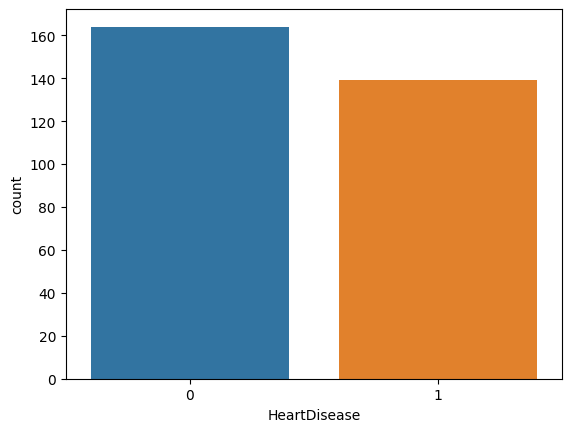

In [14]:
# Number of HeartDisease
sns.countplot(x="HeartDisease", data=data,)
plt.xticks(rotation = 0)
plt.show()

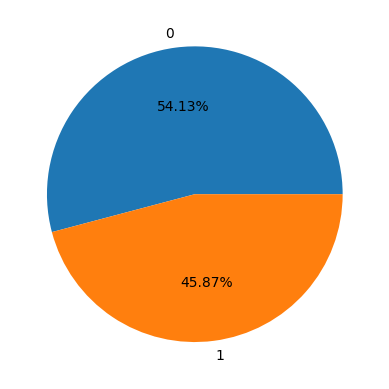

In [15]:
# plot a pie chart and see percentages of HeartDisease
plt.pie(data['HeartDisease'].value_counts(), labels=data['HeartDisease'].unique(), autopct='%1.2f%%')
plt.show() 

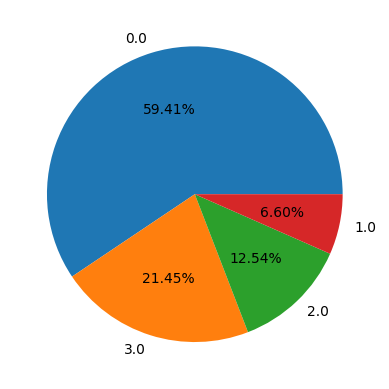

In [16]:
# plot a pie chart and see percentages of MajorVesselNum
plt.pie(data['MajorVesselNum'].value_counts(), labels=data['MajorVesselNum'].unique(), autopct='%1.2f%%')
plt.show() 

In [17]:
#Exploratory Visualization

def visualization(column):
    def values(column):
        d = {} #creating a dictionary
        d1 = data[[column, 'HeartDisease']] #extracting the column and the HeartDisease columns from the data
        for j in d1[column].unique(): #for each unique attribute of the selected column
            d2 = (d1[d1[column] == j])['HeartDisease'].value_counts()  #give the number of unique value of HeartDisease for each attribute
            for i in d1['HeartDisease'].unique(): #unique values of HeartDisease
                if i in d2: 
                    if i in d:
                        d[i].append(d2[i]) 
                    else:
                        d[i] = []   #creating a key with the name of the target label and the value is the number of examples
                        d[i].append(d2[i])
                else:
                    if i in d:
                        d[i].append(0)
                    else:
                        d[i] = []
                        d[i].append(0)
        return d
    
    N=len(data[column].unique())
    w=0.3
    x=np.arange(N)
    dict1 = values(column)
    ax = plt.subplot(111)
    p1 = ax.bar(x-(1.5*w), dict1[0], width = w, color = 'g', align = 'center')
    p2 = ax.bar(x-(0.5*w), dict1[1], width = w, color = 'r', align = 'center')

    ax.autoscale(tight=True)
    plt.xlabel(f"'{column}' Column")
    plt.title(f"'{column}' Column Distribution According to HeartDisease")
    plt.ylabel('Frequency')
    plt.xticks(x, data[column].unique())
    plt.yticks(np.arange(0, 250, 50))
    plt.legend((p1[0], p2[0]), ('NoHD', 'HD'))
    plt.show()

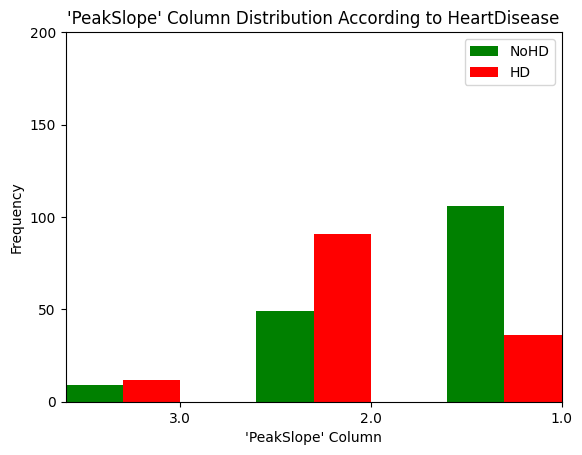

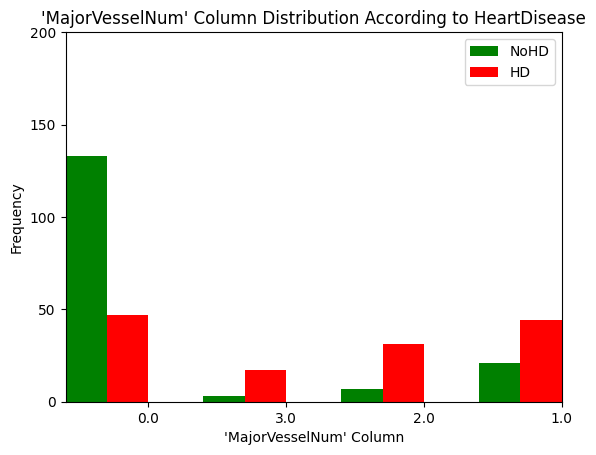

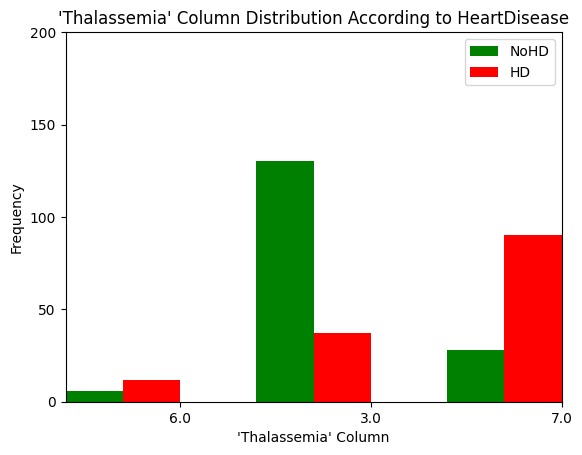

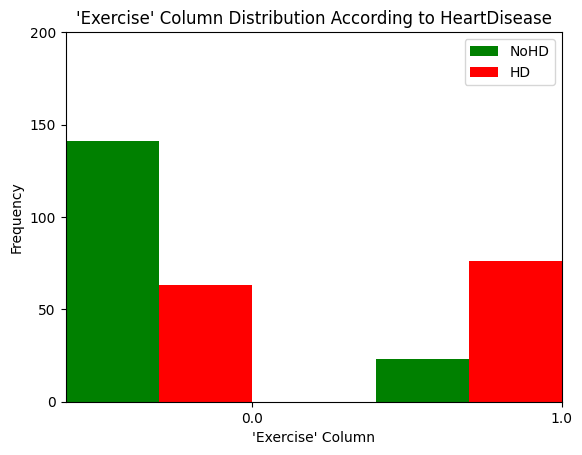

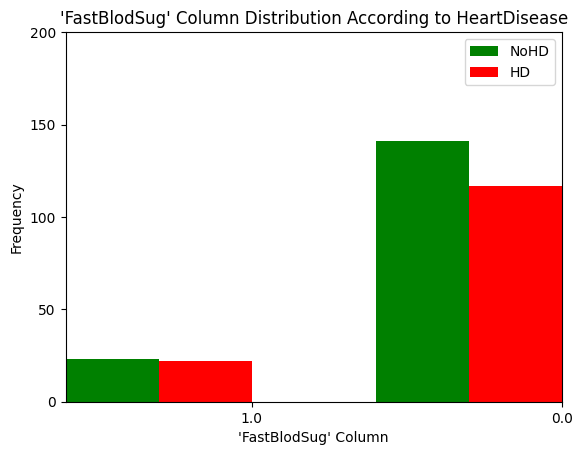

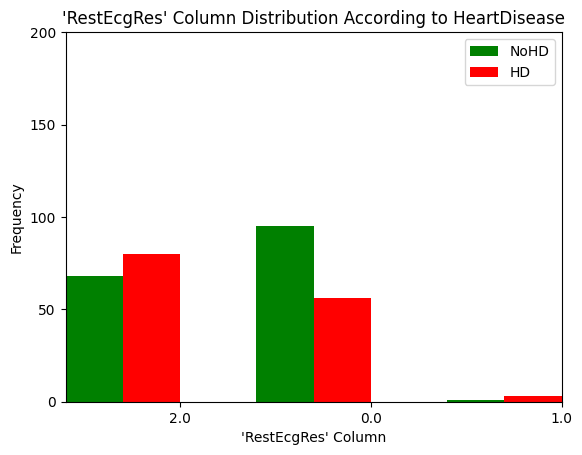

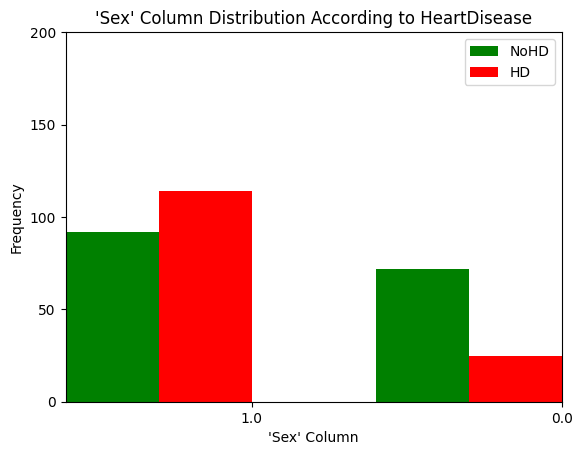

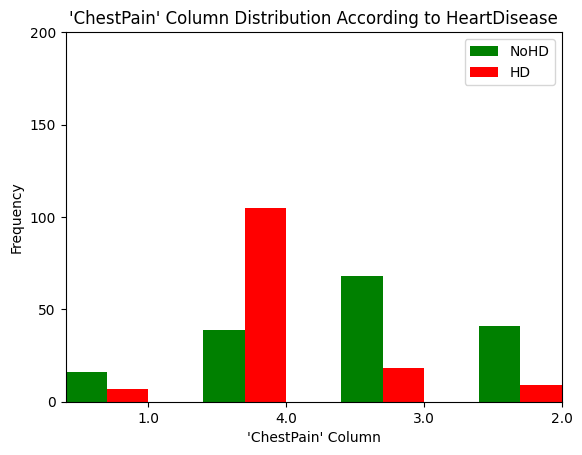

In [18]:
categorical_columns = ["PeakSlope", "MajorVesselNum","Thalassemia", "Exercise" , 
                       "FastBlodSug", "RestEcgRes" ,"Sex" ,"ChestPain"]
for i in categorical_columns:
    visualization(i)

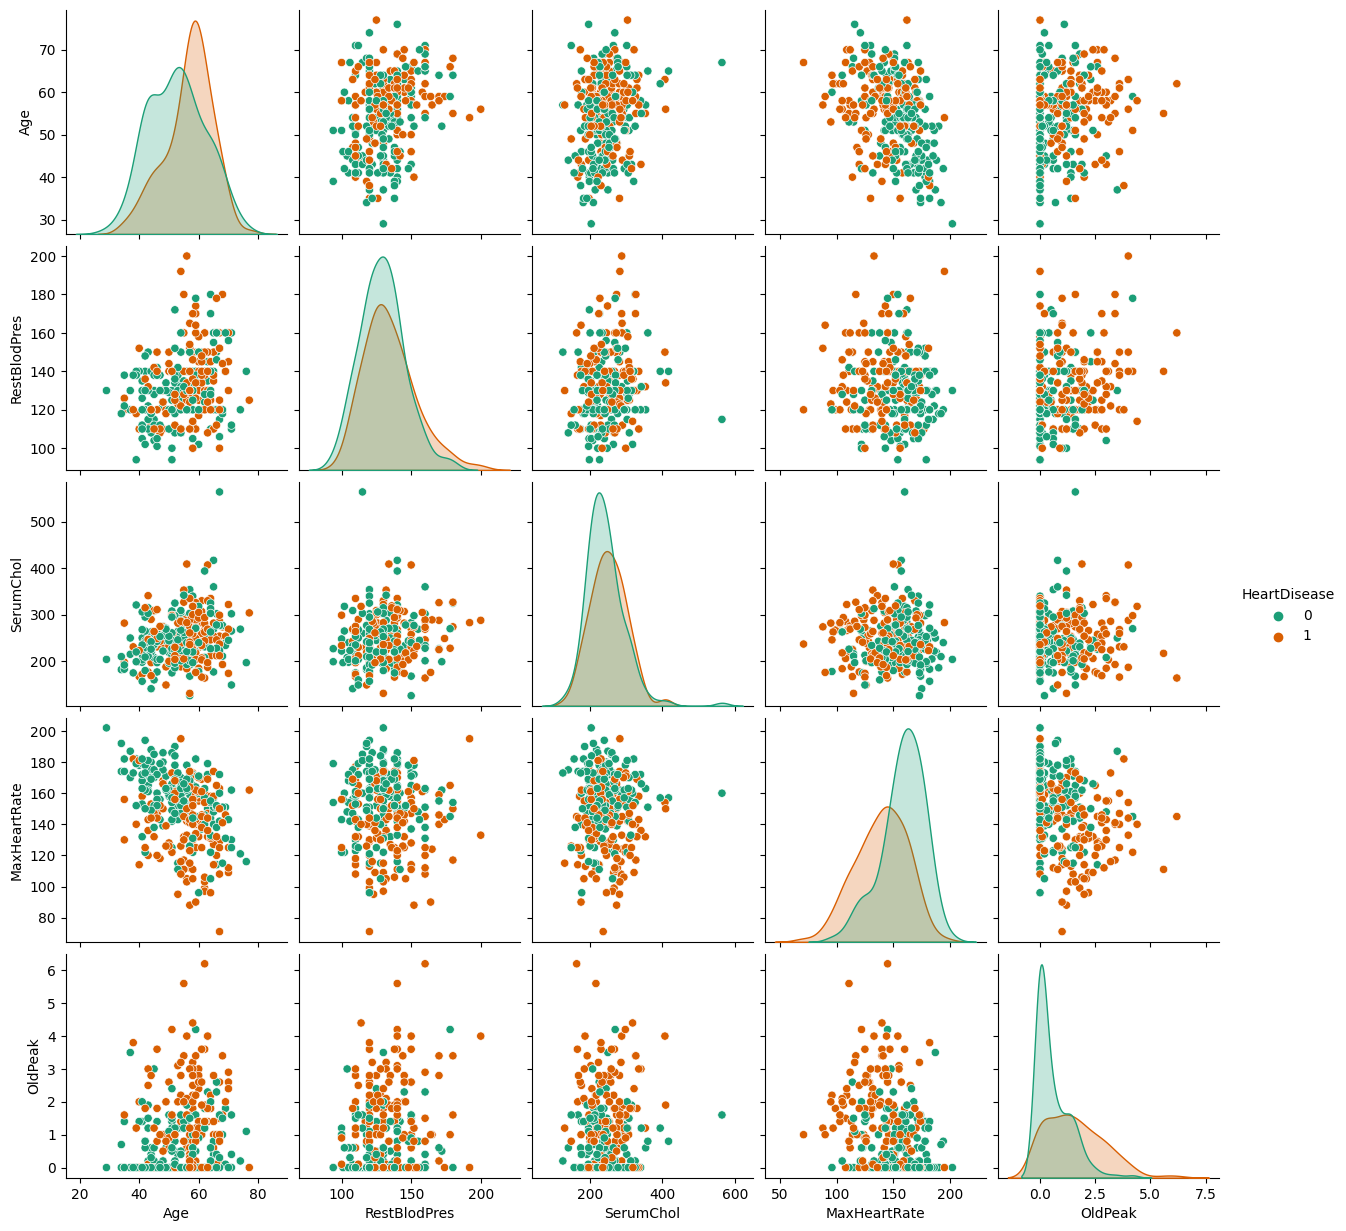

In [19]:
# see pairplot for relation between the columns
sns.pairplot(data[["Age", "RestBlodPres", "SerumChol", "MaxHeartRate", "OldPeak", "HeartDisease"]],
             hue="HeartDisease", palette='Dark2')
plt.show()

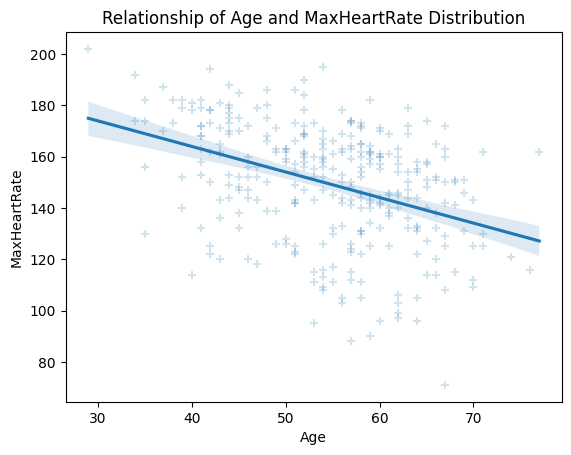

In [20]:
sns.regplot(x='Age', y='MaxHeartRate', data=data, marker="+", scatter_kws={'alpha':0.2})
plt.title('Relationship of Age and MaxHeartRate Distribution')
plt.show()

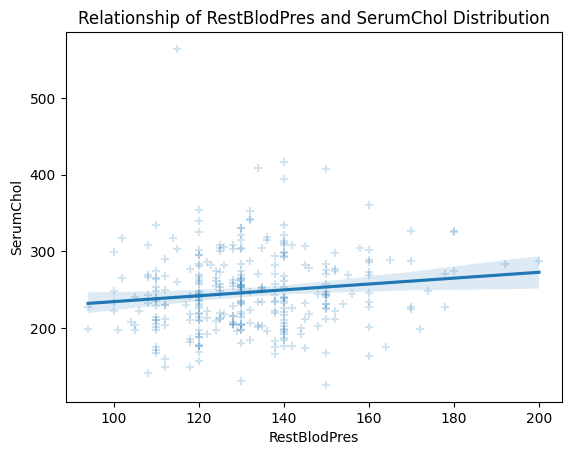

In [21]:
sns.regplot(x='RestBlodPres', y='SerumChol', data=data, marker="+", scatter_kws={'alpha':0.2})
plt.title('Relationship of RestBlodPres and SerumChol Distribution')
plt.show()

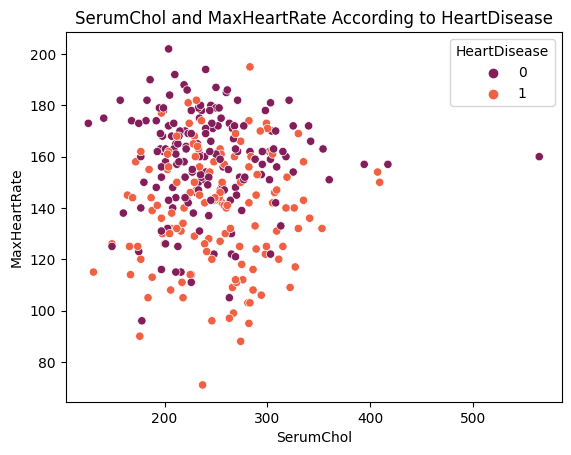

In [22]:
sns.scatterplot(x='SerumChol', y='MaxHeartRate', hue='HeartDisease', data=data, palette = "rocket")
plt.title('SerumChol and MaxHeartRate According to HeartDisease')
plt.show()

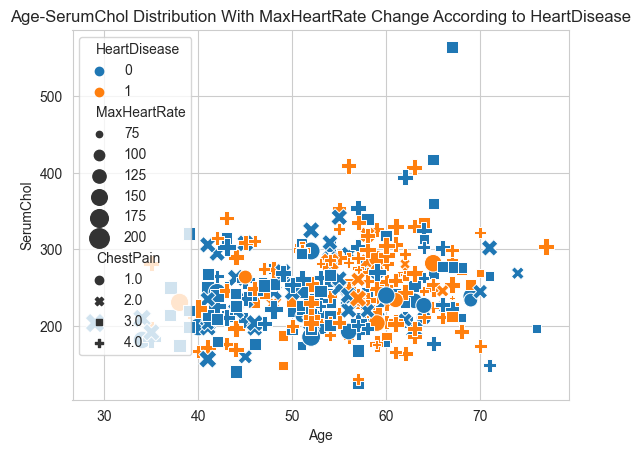

In [23]:
sns.set_style("whitegrid")
sns.scatterplot(x="Age", y='SerumChol', hue="HeartDisease", style="ChestPain", size='MaxHeartRate', sizes=(15,200), data=data)
plt.xlabel("Age")
plt.ylabel("SerumChol")
plt.title("Age-SerumChol Distribution With MaxHeartRate Change According to HeartDisease")
plt.show()

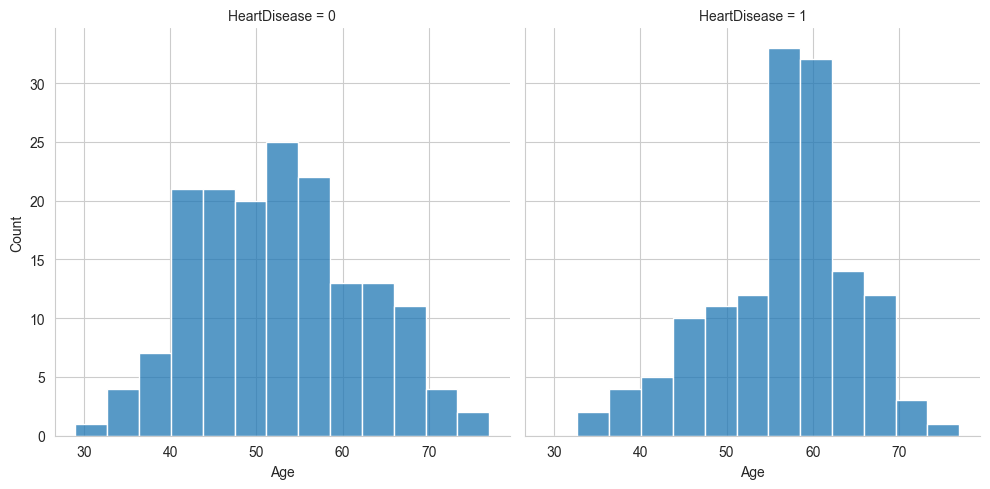

In [24]:
sns.displot(data, x="Age", col="HeartDisease", multiple="dodge")
plt.show()

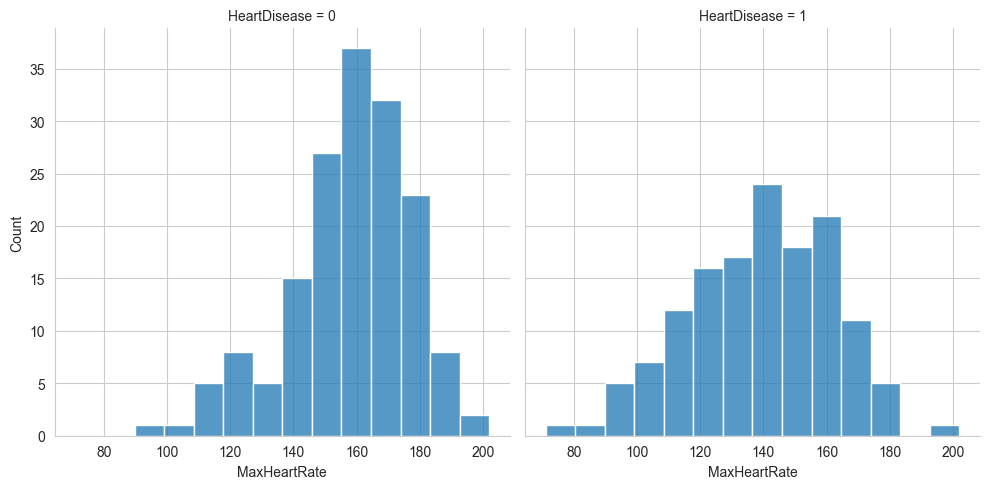

In [25]:
sns.displot(data, x='MaxHeartRate', col="HeartDisease", multiple="dodge")
plt.show()

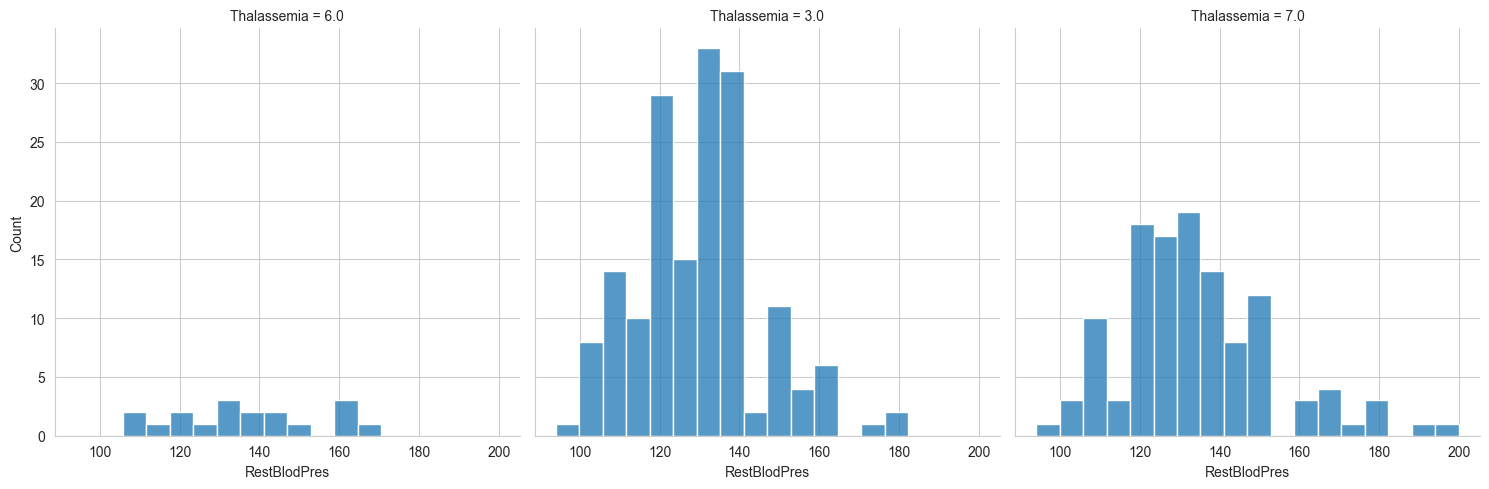

In [26]:
sns.displot(data, x="RestBlodPres", col="Thalassemia", multiple="dodge")
plt.show()

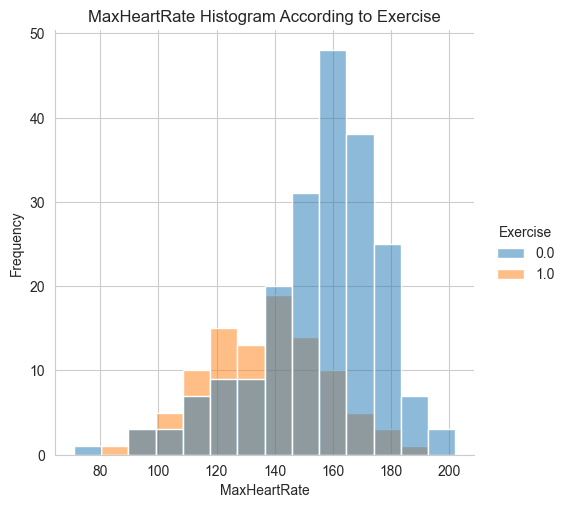

In [27]:
sns.displot(data, x='MaxHeartRate', hue="Exercise")
plt.ylabel("Frequency")
plt.title("MaxHeartRate Histogram According to Exercise")
plt.show()

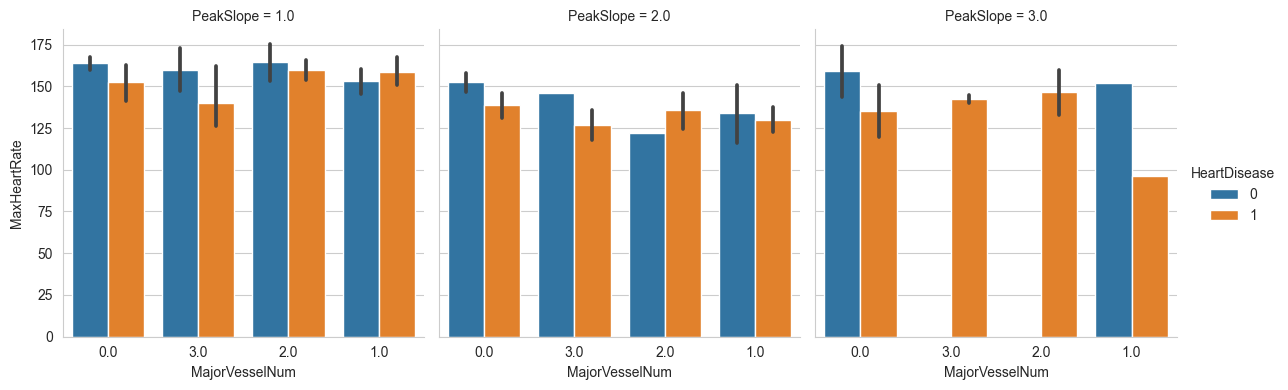

In [28]:
sns.catplot(x="MajorVesselNum", y="MaxHeartRate",  hue="HeartDisease", col="PeakSlope",
                data=data, kind="bar",height=4)
plt.show()

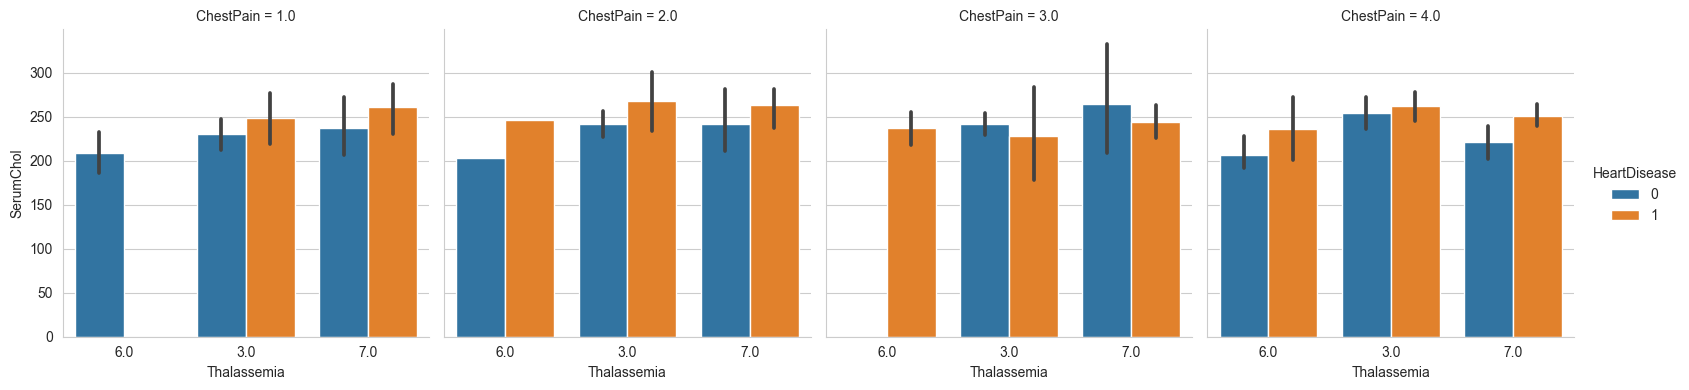

In [29]:
sns.catplot(x="Thalassemia", y="SerumChol",  hue="HeartDisease", col="ChestPain",
                data=data, kind="bar",height=4)
plt.show()

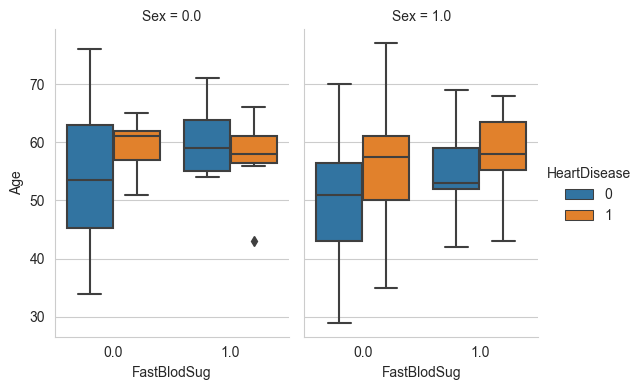

In [30]:
sns.catplot(x="FastBlodSug", y="Age", hue="HeartDisease", col="Sex",
            data=data, kind="box",height=4, aspect=.7);

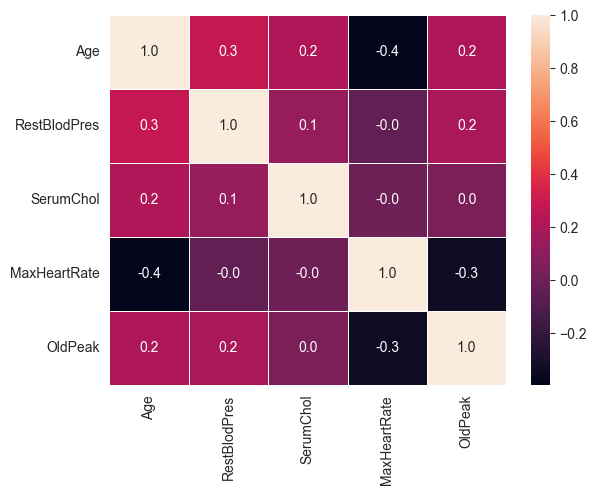

In [31]:
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

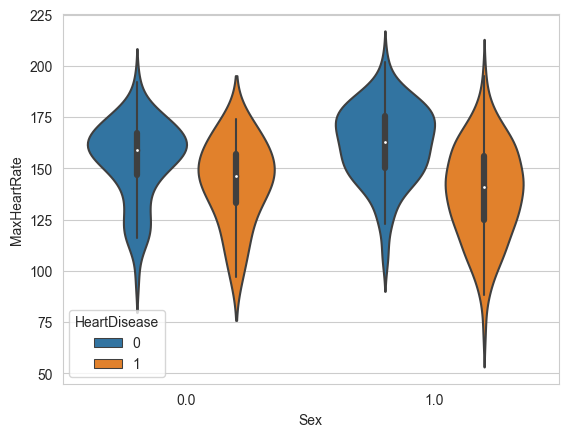

In [32]:
sns.violinplot(x="Sex", y="MaxHeartRate", data=data, hue="HeartDisease")
plt.show()

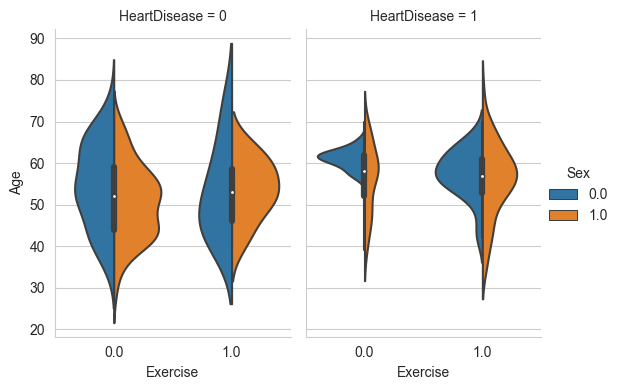

In [33]:
sns.catplot(x="Exercise", y="Age",
                hue="Sex", col="HeartDisease",
                data=data, kind="violin", split=True,
                height=4, aspect=.7)
plt.show()

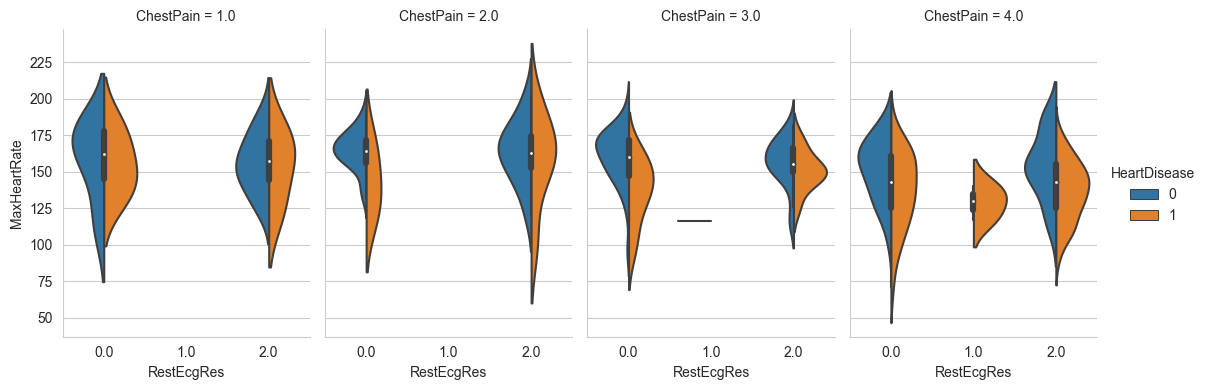

In [34]:
sns.catplot(x="RestEcgRes", y="MaxHeartRate",
                hue="HeartDisease", col="ChestPain",
                data=data, kind="violin", split=True,
                height=4, aspect=.7)
plt.show()

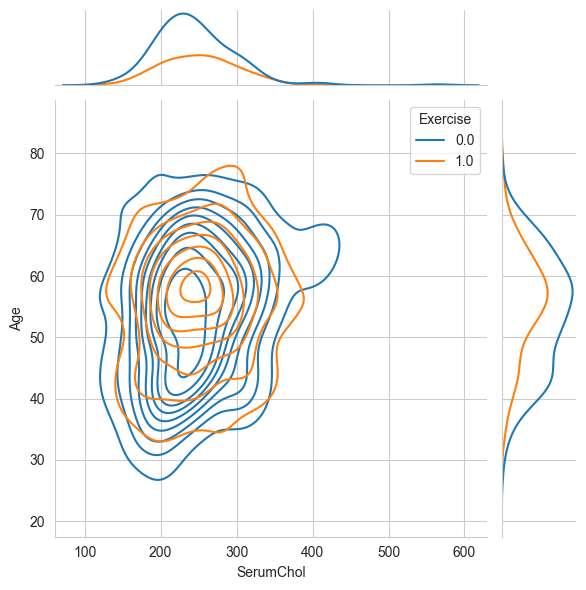

In [35]:
sns.jointplot(
    data=data,
    x="SerumChol", y="Age", hue="Exercise",
    kind="kde")
plt.show()

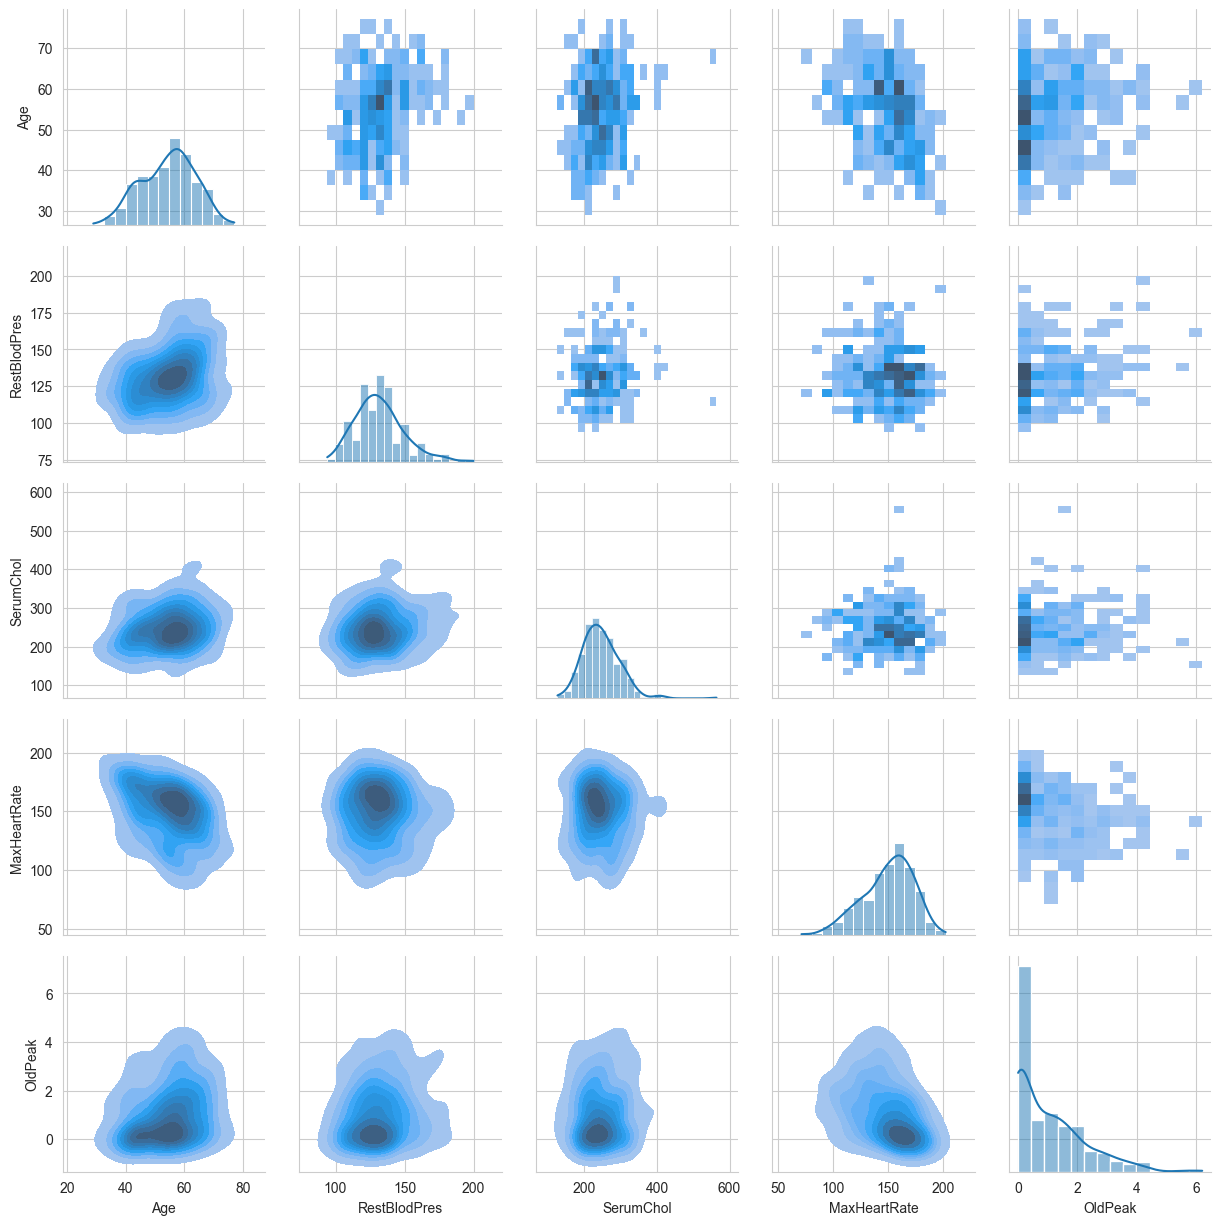

In [36]:
g = sns.PairGrid(data[["Age", "RestBlodPres", "SerumChol", "MaxHeartRate", "OldPeak"]])
g.map_upper(sns.histplot) 
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
plt.show()

## Preprocessing

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [38]:
categorical_variables = ["PeakSlope", "MajorVesselNum","Thalassemia", "Exercise", 
                         "FastBlodSug", "RestEcgRes" ,"Sex" , "ChestPain"]
for i in categorical_variables:
    print(f"For {i} column ")
    data[f"{i}"] = labelEncoder(data[f"{i}"])
    print("**********************************")

For PeakSlope column 
Encoding Approach:
3.0  ==>  2
2.0  ==>  1
1.0  ==>  0
**********************************
For MajorVesselNum column 
Encoding Approach:
0.0  ==>  0
3.0  ==>  3
2.0  ==>  2
1.0  ==>  1
**********************************
For Thalassemia column 
Encoding Approach:
6.0  ==>  1
3.0  ==>  0
7.0  ==>  2
**********************************
For Exercise column 
Encoding Approach:
0.0  ==>  0
1.0  ==>  1
**********************************
For FastBlodSug column 
Encoding Approach:
1.0  ==>  1
0.0  ==>  0
**********************************
For RestEcgRes column 
Encoding Approach:
2.0  ==>  2
0.0  ==>  0
1.0  ==>  1
**********************************
For Sex column 
Encoding Approach:
1.0  ==>  1
0.0  ==>  0
**********************************
For ChestPain column 
Encoding Approach:
1.0  ==>  0
4.0  ==>  3
3.0  ==>  2
2.0  ==>  1
**********************************


In [39]:
data

,Age,Sex,ChestPain,RestBlodPres,SerumChol,FastBlodSug,RestEcgRes,MaxHeartRate,Exercise,OldPeak,PeakSlope,MajorVesselNum,Thalassemia,HeartDisease
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0,1,0
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3,0,1
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2,2,1
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0,0,0
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,0,110.0,264.0,0,0,132.0,0,1.2,1,0,2,1
299,68.0,1,3,144.0,193.0,1,0,141.0,0,3.4,1,2,2,1
300,57.0,1,3,130.0,131.0,0,0,115.0,1,1.2,1,1,2,1
301,57.0,0,1,130.0,236.0,0,2,174.0,0,0.0,1,1,0,1


In [40]:
# create input and output
X = data.drop('HeartDisease', axis = 1)

#Your y is of type object, so sklearn cannot recognize its type. Add the line y=y.astype('int')
#in this case
y = data['HeartDisease'].astype('int')

In [41]:
# for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (257, 13)
y_train: (257,)
X_test: (46, 13)
y_test: (46,)


## Model Training and Evaluation

In [42]:
# import classifiers and metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

def allClassifiers(X_train, X_test, y_train, y_test):
    """
    This function use multiple machine learning classifier and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: accuracy score, classification report, confusion matrix for each classifier 
    and comparison plot for classifiers according to accuracy
    """

    # standardization of train and test data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    classifiers = [SVC(), DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(),
                   BaggingClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
                   LogisticRegression(), XGBClassifier()]
    accuracy_score_dict = {}
    acc_scores = []
    
    
    # function for accuracy score
    def accScore(classifier):
        """
        :param classifier: classifier model function
        :return: accuracy score for classifier
        """
        
        clf = classifier.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_score = accuracy_score(y_test, pred)
        return acc_score
    

    # function for confusion matrix and classification report
    def confusionandReport(classifier):
        """
        :param classifier: classifier model function
        :return: confusion matrix and classification report for classifier
        """
        
        clf = classifier.fit(X_train, y_train)
        pred = clf.predict(X_test)
        print(f"Confusion Matrix and Classification Report for {classifier} Classifier")
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))


    # accuracy score, confusion matrix and classification report for each classifier 
    for classifier in classifiers:
        name = classifier.__class__.__name__
        accuracy_score_dict[name] = accScore(classifier)
        acc_scores.append(accScore(classifier))
        print("*************************************************************************")
        print(f"{name} Accuracy Score = {accuracy_score_dict[name]}")
        confusionandReport(classifier)
        

    #Plotting the performance of Classifiers
    def plotPerformance(scores_list, scores_dict):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include classifier and evaluation scores
        :return: plot of performance comparison of classifiers
        """
        
        N = len(classifiers)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Classifiers")
        plt.title("Performance Comparison of Classifiers")
        plt.ylabel("Accuracy Score")
        plt.xticks(x,
                   scores_dict.keys(),
                   rotation=90)
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.show()
    
    # call the function
    plotPerformance(acc_scores, accuracy_score_dict)

*************************************************************************
SVC Accuracy Score = 0.8695652173913043
Confusion Matrix and Classification Report for SVC() Classifier
[[27  4]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.76      0.87      0.81        15

    accuracy                           0.87        46
   macro avg       0.85      0.87      0.86        46
weighted avg       0.88      0.87      0.87        46

*************************************************************************
DecisionTreeClassifier Accuracy Score = 0.6521739130434783
Confusion Matrix and Classification Report for DecisionTreeClassifier() Classifier
[[20 11]
 [ 5 10]]
              precision    recall  f1-score   support

           0       0.80      0.65      0.71        31
           1       0.48      0.67      0.56        15

    accuracy                           0.65        46
   macro avg       0.64

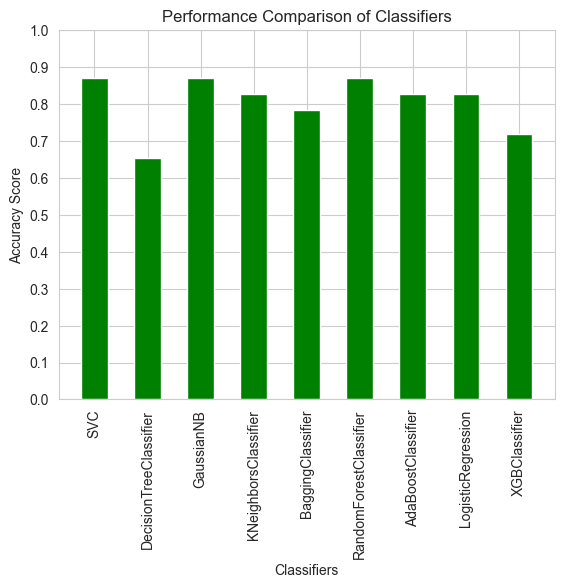

In [43]:
allClassifiers(X_train, X_test, y_train, y_test)

## Model Selection and Parameter Tuning

In [44]:
# choose the best model for parameter tuning
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_train_predictions = svc_model.predict(X_train)
svc_test_predictions = svc_model.predict(X_test)
print('Train Accuracy Score for Support Vector Machine Classifier:', accuracy_score(svc_train_predictions, y_train))
print("Test Accuracy Score for Support Vector Machine Classifier:", accuracy_score(svc_test_predictions, y_test))
print(confusion_matrix(y_test, svc_test_predictions))
print(classification_report(y_test, svc_test_predictions))

Train Accuracy Score for Support Vector Machine Classifier: 0.9105058365758755
Test Accuracy Score for Support Vector Machine Classifier: 0.8695652173913043
[[27  4]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.76      0.87      0.81        15

    accuracy                           0.87        46
   macro avg       0.85      0.87      0.86        46
weighted avg       0.88      0.87      0.87        46



In [45]:
# GridSearchCV for Support Vector Machine Classifier
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly','sigmoid','linear'],
              'degree': [1,2,3,4,5,6]} 

gsc_rf = GridSearchCV(svc_model, param_grid, cv=5, verbose=1, n_jobs=1)
grid_results_rf = gsc_rf.fit(X_train, y_train)
grid_results_rf.best_params_

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}

In [46]:
# Summarize the results in a readable format
print(f"Best 8 test score: {(np.sort(grid_results_rf.cv_results_['mean_test_score']))[::-1][:8]}")
results_df = pd.DataFrame(grid_results_rf.cv_results_)

cleaned_results_df = results_df[["mean_fit_time", "mean_test_score", "std_test_score", "rank_test_score"]]
cleaned_results_df.sort_values("rank_test_score",).head(3)

Best 8 test score: [0.85625943 0.85625943 0.85625943 0.85625943 0.85625943 0.85625943
 0.85625943 0.85625943]


,mean_fit_time,mean_test_score,std_test_score,rank_test_score
129,0.003124,0.856259,0.060058,1
230,0.004775,0.856259,0.060058,1
478,0.003324,0.856259,0.060058,1


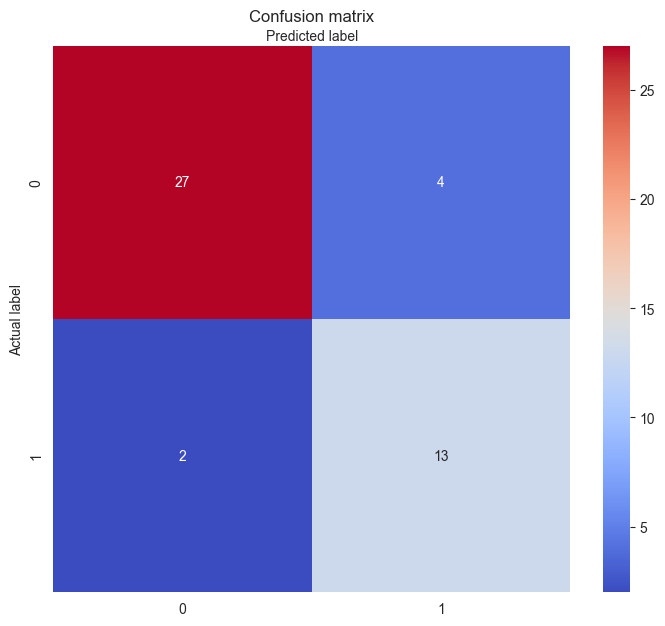

After Tuning Test Accuracy Score for Support Vector Machine Classifier: 0.8695652173913043


In [47]:
# Extract the best model
best_clf = grid_results_rf.best_estimator_
y_pred = best_clf.predict(X_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("After Tuning Test Accuracy Score for Support Vector Machine Classifier:", accuracy_score(y_pred, y_test))

unfortunately there is no improvement with parameter tuning